In [1]:
import torch
from matplotlib import pyplot as plt
import matplotlib_inline

In [2]:
# 人工数据集生成函数
def synthetic(W:torch.tensor,b:torch.tensor,nums:int):
    X = torch.normal(0,1,(nums,len(W)))
    y = torch.matmul(X,W)+b
    y += torch.normal(0,0.1,y.shape)
    return X,y

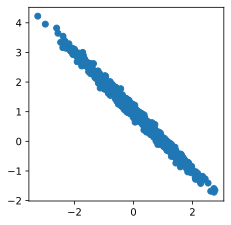

In [3]:
#生成人工数据集，并且可视化
W = torch.tensor([-1.])
b = torch.tensor([1.])
features,labels = synthetic(W,b,1000)
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize']=(3.5,3.5)
plt.scatter(features,labels)

In [4]:
#定义模型
def net(X,W,b):
    return torch.matmul(X,W)+b

In [5]:
#定义损失函数：
def loss(y_hat:torch.tensor,y:torch.tensor):
    return (y_hat-y)**2/2

In [6]:
#定义优化(优化)算法,最小梯度下降算法
def updater(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [ ]:
def train(num_epochs,batch_size,features,labels,updater,loss,net):
    for epoch in range(num_epochs):
        l = loss(net())